In [10]:
import os
import re
import csv

# Define the directory containing log files
log_dir = "./logs"

# Define a regex pattern to extract matrix size and time
pattern = re.compile(r"Matrix inversion \(Parallel\) completed in ([\d\.]+) ms for (\d+)x\2 matrix\.")

# Loop through all files in the log directory
for filename in os.listdir(log_dir):
    if filename.startswith("log_ncpu_") and filename.endswith(".txt"):
        # Extract the number of CPUs from the filename
        ncpu = filename.split("_")[2].split(".")[0]
        output_csv = f"{ncpu}.csv"

        # Initialize a list to store extracted data
        data = []

        file_path = os.path.join(log_dir, filename)
        with open(file_path, "r") as file:
            content = file.read()
            matches = pattern.findall(content)
            for match in matches:
                time_ms, size = match
                data.append([int(size), float(time_ms)])

        # Sort data by matrix size
        data.sort(key=lambda x: x[0])

        # Write data to a CSV file
        with open(output_csv, "w", newline="") as csvfile:
            csv_writer = csv.writer(csvfile)
            csv_writer.writerow(["Matrix Size", "Time (ms)"])
            csv_writer.writerows(data)

        print(f"Data from {filename} has been successfully extracted and saved to {output_csv}.")


Data from log_ncpu_16.txt has been successfully extracted and saved to 16.csv.
Data from log_ncpu_64.txt has been successfully extracted and saved to 64.csv.
Data from log_ncpu_8.txt has been successfully extracted and saved to 8.csv.
Data from log_ncpu_1.txt has been successfully extracted and saved to 1.csv.
Data from log_ncpu_2.txt has been successfully extracted and saved to 2.csv.
Data from log_ncpu_32.txt has been successfully extracted and saved to 32.csv.


## Render graphs

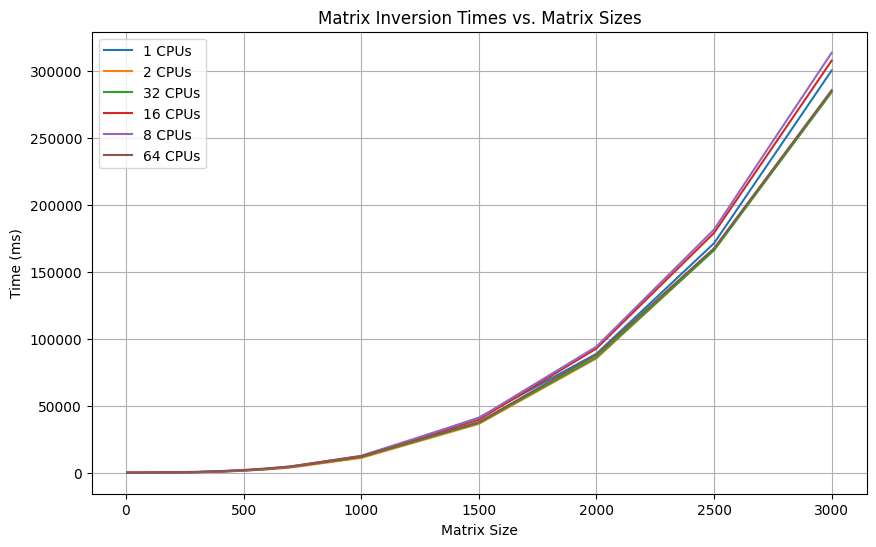

In [11]:
import os
import csv
import matplotlib.pyplot as plt

# Define the directory containing CSV files
csv_dir = "./"

# Initialize a dictionary to store data for each CPU
cpu_data = {}

# Loop through all files in the CSV directory
for filename in os.listdir(csv_dir):
    if filename.endswith(".csv"):
        # Extract the number of CPUs from the filename
        ncpu = filename.split(".")[0]

        # Read data from the CSV file
        matrix_sizes = []
        times = []
        with open(os.path.join(csv_dir, filename), "r") as csvfile:
            csv_reader = csv.reader(csvfile)
            next(csv_reader)  # Skip the header row
            for row in csv_reader:
                matrix_sizes.append(int(row[0]))
                times.append(float(row[1]))

        # Store the data
        cpu_data[ncpu] = (matrix_sizes, times)

# Plot the data
plt.figure(figsize=(10, 6))
for ncpu, (matrix_sizes, times) in cpu_data.items():
    plt.plot(matrix_sizes, times, label=f"{ncpu} CPUs")

# Customize the plot
plt.title("Matrix Inversion Times vs. Matrix Sizes")
plt.xlabel("Matrix Size")
plt.ylabel("Time (ms)")
plt.legend()
plt.grid(True)

# Show the plot
plt.show()


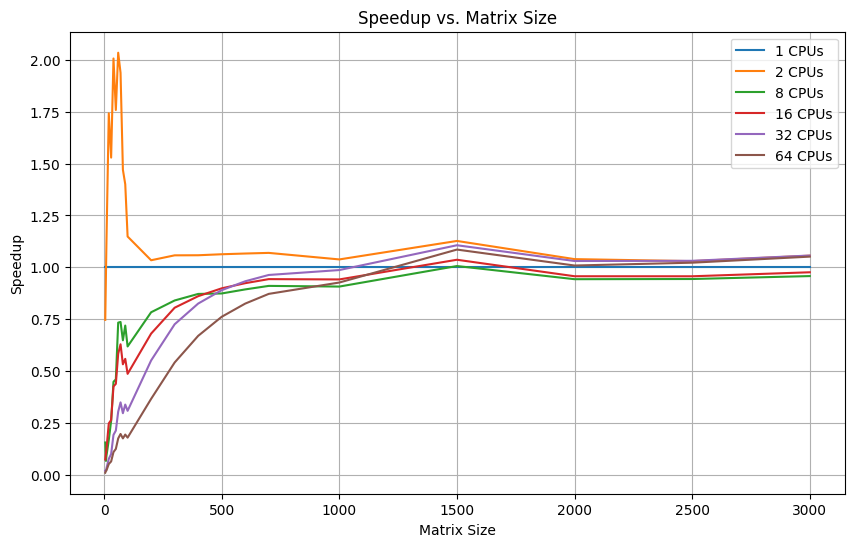

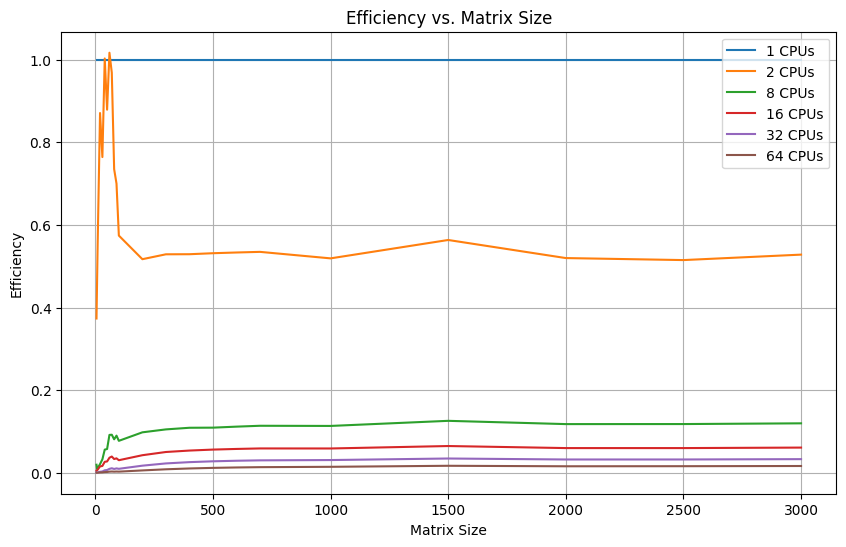

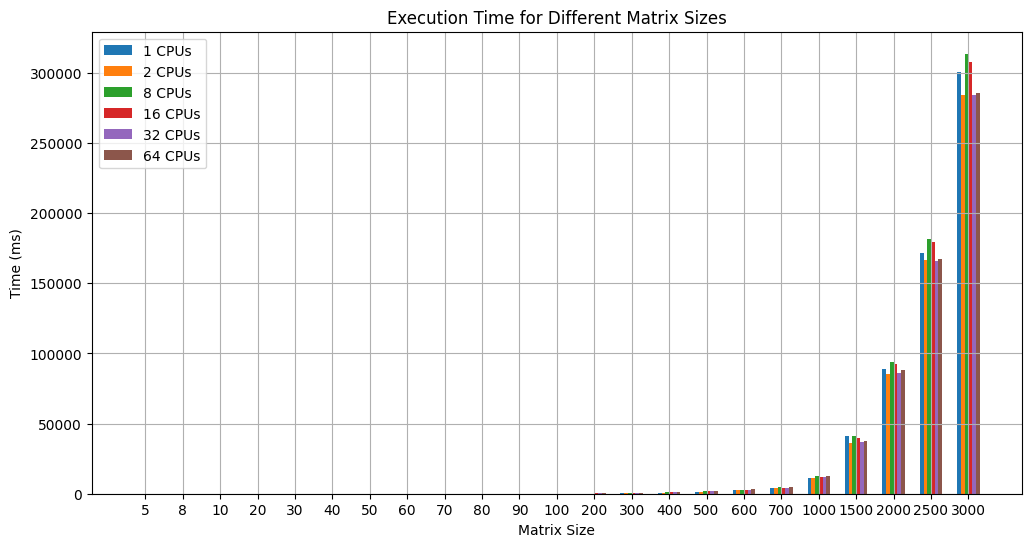

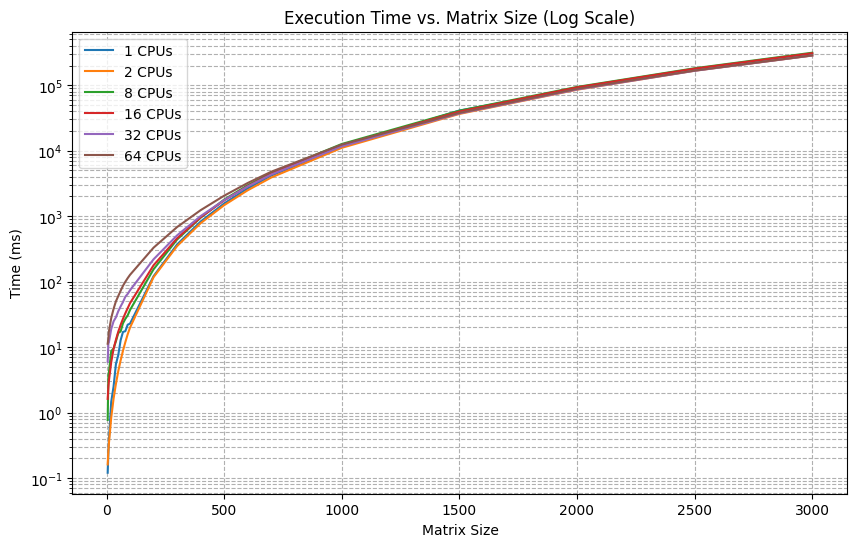

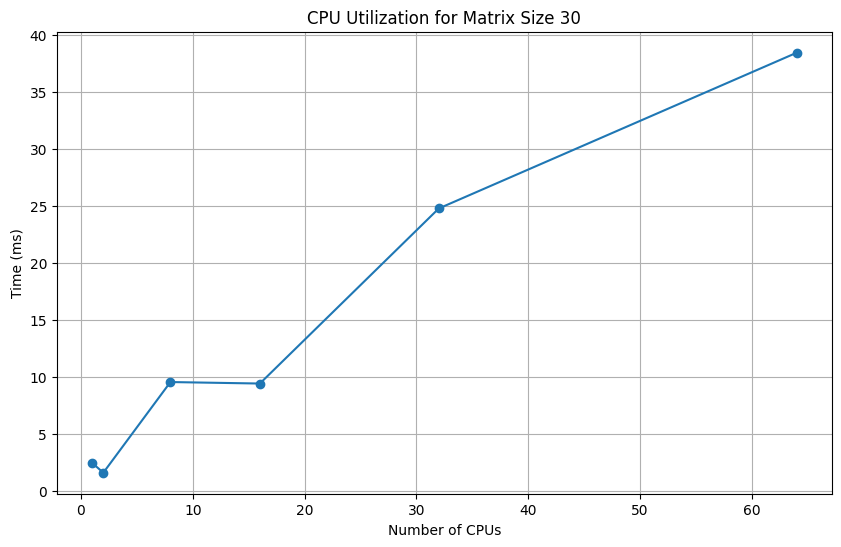

In [12]:
import os
import csv
import matplotlib.pyplot as plt
import numpy as np

# Define the directory containing CSV files
csv_dir = "./"

# Initialize a dictionary to store data for each CPU
cpu_data = {}

# Loop through all files in the CSV directory
for filename in os.listdir(csv_dir):
    if filename.endswith(".csv") and filename != "matrix_inversion_times.csv":
        # Extract the number of CPUs from the filename
        ncpu = int(filename.split(".")[0])

        # Read data from the CSV file
        matrix_sizes = []
        times = []
        with open(os.path.join(csv_dir, filename), "r") as csvfile:
            csv_reader = csv.reader(csvfile)
            next(csv_reader)  # Skip the header row
            for row in csv_reader:
                matrix_sizes.append(int(row[0]))
                times.append(float(row[1]))

        # Store the data
        cpu_data[ncpu] = (matrix_sizes, times)

# Sort the CPU data by the number of CPUs
cpu_data = dict(sorted(cpu_data.items()))

# Get the baseline (single CPU data)
baseline_ncpu = min(cpu_data.keys())
baseline_sizes, baseline_times = cpu_data[baseline_ncpu]

# 1. Speedup vs. Matrix Size
plt.figure(figsize=(10, 6))
for ncpu, (matrix_sizes, times) in cpu_data.items():
    speedup = [baseline_times[i] / t for i, t in enumerate(times)]
    plt.plot(matrix_sizes, speedup, label=f"{ncpu} CPUs")

plt.title("Speedup vs. Matrix Size")
plt.xlabel("Matrix Size")
plt.ylabel("Speedup")
plt.legend()
plt.grid(True)
plt.show()

# 2. Efficiency vs. Matrix Size
plt.figure(figsize=(10, 6))
for ncpu, (matrix_sizes, times) in cpu_data.items():
    speedup = [baseline_times[i] / t for i, t in enumerate(times)]
    efficiency = [s / ncpu for s in speedup]
    plt.plot(matrix_sizes, efficiency, label=f"{ncpu} CPUs")

plt.title("Efficiency vs. Matrix Size")
plt.xlabel("Matrix Size")
plt.ylabel("Efficiency")
plt.legend()
plt.grid(True)
plt.show()

# 3. Execution Time as Bar Chart (Grouped by CPUs)
matrix_sizes = baseline_sizes
x = np.arange(len(matrix_sizes))
width = 0.1

plt.figure(figsize=(12, 6))
for i, (ncpu, (matrix_sizes, times)) in enumerate(cpu_data.items()):
    plt.bar(x + i * width, times, width, label=f"{ncpu} CPUs")

plt.title("Execution Time for Different Matrix Sizes")
plt.xlabel("Matrix Size")
plt.ylabel("Time (ms)")
plt.xticks(x + width * (len(cpu_data) - 1) / 2, matrix_sizes)
plt.legend()
plt.grid(True)
plt.show()

# 4. Logarithmic Scale for Time vs. Matrix Size
plt.figure(figsize=(10, 6))
for ncpu, (matrix_sizes, times) in cpu_data.items():
    plt.plot(matrix_sizes, times, label=f"{ncpu} CPUs")

plt.yscale("log")
plt.title("Execution Time vs. Matrix Size (Log Scale)")
plt.xlabel("Matrix Size")
plt.ylabel("Time (ms)")
plt.legend()
plt.grid(True, which="both", linestyle="--")
plt.show()

# 5. CPU Utilization for Fixed Matrix Size
fixed_size_index = 4  # Change this index to select a different matrix size (0-based)
matrix_size_label = baseline_sizes[fixed_size_index]
cpu_counts = []
times_for_fixed_size = []

for ncpu, (matrix_sizes, times) in cpu_data.items():
    cpu_counts.append(ncpu)
    times_for_fixed_size.append(times[fixed_size_index])

plt.figure(figsize=(10, 6))
plt.plot(cpu_counts, times_for_fixed_size, marker="o")
plt.title(f"CPU Utilization for Matrix Size {matrix_size_label}")
plt.xlabel("Number of CPUs")
plt.ylabel("Time (ms)")
plt.grid(True)
plt.show()
